In [ ]:
#healthcare_data_generator.py

In [10]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from datetime import datetime, timedelta
import warnings
warnings.filterwarnings('ignore')

print("🏥 Healthcare Analytics Dashboard Project")
print("🎗️ Based on Cancer Council NSW Experience")
print("=" * 50)

# ================================================================================
# PART 1: HEALTHCARE DATA GENERATION
# ================================================================================

print("📊 GENERATING COMPREHENSIVE HEALTHCARE DATA")
print("=" * 40)

# Set random seed for reproducibility
np.random.seed(42)

# Date range: 2 years of daily data
start_date = datetime(2023, 1, 1)
end_date = datetime(2024, 12, 31)
date_range = pd.date_range(start_date, end_date, freq='D')

# Healthcare facility structure
departments = ['Oncology', 'Emergency', 'Surgery', 'Cardiology', 'Pediatrics', 
               'Radiology', 'Laboratory', 'Outpatient', 'ICU', 'Mental Health']
facilities = ['Central Hospital', 'North Clinic', 'South Medical Center', 
              'East Outpatient', 'West Specialty Center']
regions = ['NSW Central', 'NSW North', 'NSW South', 'NSW West', 'Sydney Metro']

# Treatment and service types
treatment_types = ['Chemotherapy', 'Radiation Therapy', 'Surgery', 'Immunotherapy',
                  'Clinical Trial', 'Screening', 'Consultation', 'Follow-up',
                  'Emergency Care', 'Preventive Care']

# Staff categories
staff_categories = ['Oncologists', 'Nurses', 'Technicians', 'Support Staff',
                   'Administrators', 'Volunteers', 'Research Staff']

print(f"📅 Generating data for {len(date_range)} days")
print(f"🏥 Departments: {len(departments)}")
print(f"🏢 Facilities: {len(facilities)}")
print(f"💊 Treatment Types: {len(treatment_types)}")

# ================================================================================
# PART 2: PATIENT DATA GENERATION
# ================================================================================

print("\n👥 GENERATING PATIENT DATA")
print("=" * 25)

# Generate patient records
patient_data = []
patient_id = 1

for date in date_range[::7]:  # Weekly data points for manageable size
    for facility in facilities:
        for department in departments:
            
            # Determine base patient volume by department
            base_volume = {
                'Oncology': 45,
                'Emergency': 120,
                'Surgery': 25,
                'Cardiology': 35,
                'Pediatrics': 60,
                'Radiology': 80,
                'Laboratory': 150,
                'Outpatient': 200,
                'ICU': 15,
                'Mental Health': 30
            }[department]
            
            # Facility size factor
            facility_factor = {
                'Central Hospital': 1.5,
                'North Clinic': 0.8,
                'South Medical Center': 1.2,
                'East Outpatient': 0.6,
                'West Specialty Center': 1.0
            }[facility]
            
            # Seasonal factors (flu season, holiday effects)
            month = date.month
            seasonal_factor = 1.0
            if month in [12, 1, 2]:  # Winter - higher volume
                seasonal_factor = 1.2
            elif month in [6, 7, 8]:  # Summer - lower volume
                seasonal_factor = 0.9
            
            # Calculate daily patient volume
            daily_volume = int(base_volume * facility_factor * seasonal_factor * 
                             np.random.uniform(0.8, 1.2))
            
            for treatment_type in treatment_types:
                # Treatment distribution varies by department
                if department == 'Oncology' and treatment_type in ['Chemotherapy', 'Radiation Therapy']:
                    treatment_probability = 0.6
                elif department == 'Emergency' and treatment_type == 'Emergency Care':
                    treatment_probability = 0.8
                elif department == 'Surgery' and treatment_type == 'Surgery':
                    treatment_probability = 0.9
                else:
                    treatment_probability = np.random.uniform(0.05, 0.15)
                
                if np.random.random() < treatment_probability:
                    patients_for_treatment = int(daily_volume * treatment_probability)
                    
                    for _ in range(patients_for_treatment):
                        # Patient demographics
                        age = max(18, int(np.random.gamma(2, 25)))  # Realistic age distribution
                        gender = np.random.choice(['Male', 'Female'], p=[0.48, 0.52])
                        
                        # Treatment outcomes
                        if treatment_type in ['Chemotherapy', 'Radiation Therapy', 'Surgery']:
                            treatment_success_rate = 0.85
                        else:
                            treatment_success_rate = 0.92
                        
                        treatment_success = np.random.random() < treatment_success_rate
                        
                        # Length of stay
                        if department == 'Emergency':
                            length_of_stay = np.random.exponential(0.5)  # Hours
                        elif department == 'ICU':
                            length_of_stay = np.random.gamma(2, 3)  # Days
                        elif treatment_type == 'Surgery':
                            length_of_stay = np.random.gamma(1.5, 2)  # Days
                        else:
                            length_of_stay = np.random.exponential(1)  # Days
                        
                        # Cost calculation
                        base_cost = {
                            'Chemotherapy': 5000,
                            'Radiation Therapy': 3000,
                            'Surgery': 15000,
                            'Immunotherapy': 8000,
                            'Clinical Trial': 2000,
                            'Screening': 500,
                            'Consultation': 300,
                            'Follow-up': 200,
                            'Emergency Care': 2000,
                            'Preventive Care': 150
                        }[treatment_type]
                        
                        total_cost = base_cost * (1 + length_of_stay * 0.1) * np.random.uniform(0.8, 1.2)
                        
                        # Patient satisfaction (1-10 scale)
                        satisfaction = np.random.beta(8, 2) * 10  # Skewed towards high satisfaction
                        
                        patient_data.append({
                            'Patient_ID': patient_id,
                            'Date': date,
                            'Year': date.year,
                            'Month': date.month,
                            'Quarter': f"Q{((date.month-1)//3)+1}",
                            'Facility': facility,
                            'Department': department,
                            'Treatment_Type': treatment_type,
                            'Patient_Age': age,
                            'Patient_Gender': gender,
                            'Length_of_Stay': round(length_of_stay, 1),
                            'Treatment_Cost': round(total_cost, 2),
                            'Treatment_Success': treatment_success,
                            'Patient_Satisfaction': round(satisfaction, 1),
                            'Readmission_30d': np.random.random() < 0.08,  # 8% readmission rate
                            'Insurance_Type': np.random.choice(['Public', 'Private', 'Self-Pay'], p=[0.6, 0.35, 0.05])
                        })
                        
                        patient_id += 1

# Convert to DataFrame
df_patients = pd.DataFrame(patient_data)

print(f"✅ Patient dataset created: {df_patients.shape}")
print(f"👥 Total patients: {len(df_patients):,}")
print(f"💰 Total treatment costs: ${df_patients['Treatment_Cost'].sum()/1e6:.1f}M")

🏥 Healthcare Analytics Dashboard Project
🎗️ Based on Cancer Council NSW Experience
📊 GENERATING COMPREHENSIVE HEALTHCARE DATA
📅 Generating data for 731 days
🏥 Departments: 10
🏢 Facilities: 5
💊 Treatment Types: 10

👥 GENERATING PATIENT DATA
✅ Patient dataset created: (110762, 16)
👥 Total patients: 110,762
💰 Total treatment costs: $546.1M


In [ ]:
#healthcare_dashboard.ipynb

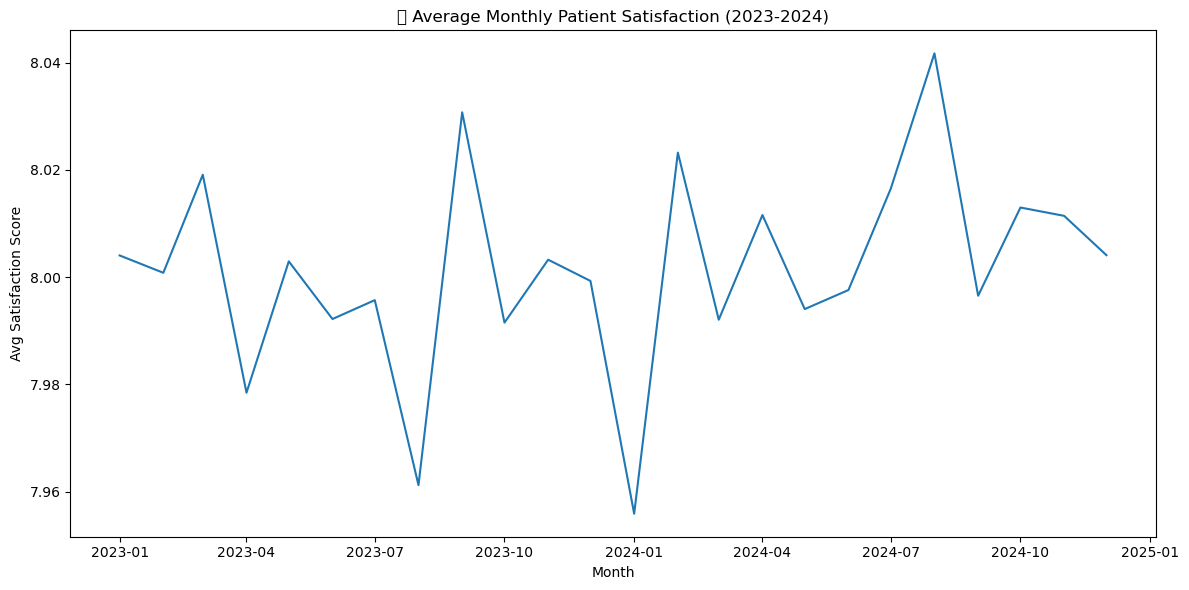

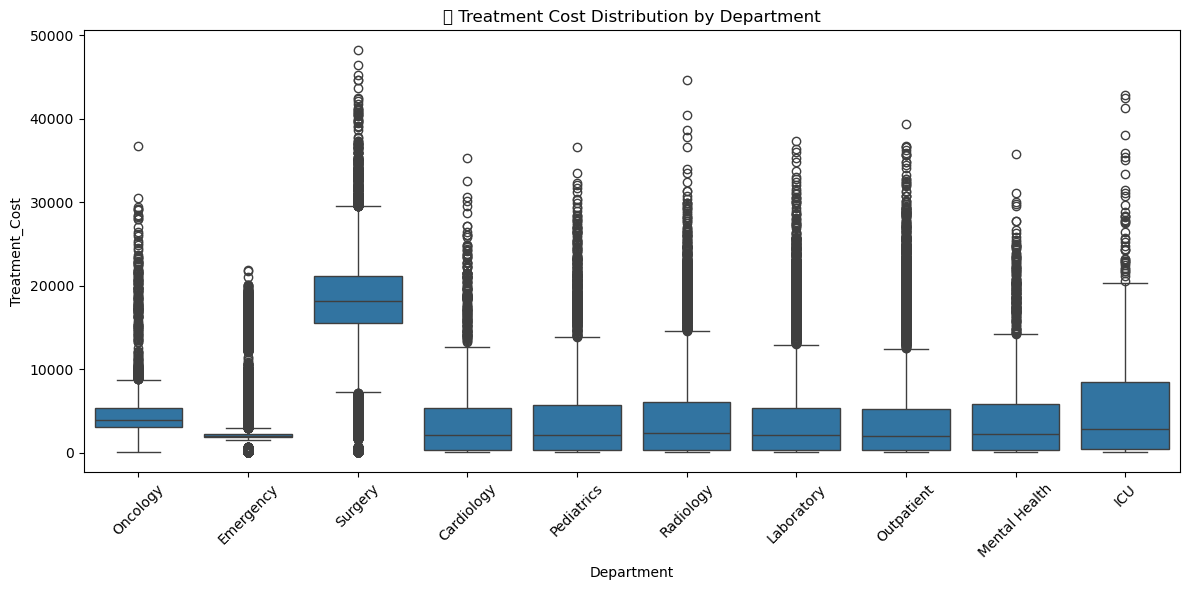

In [12]:

import os

os.makedirs("visuals", exist_ok=True)
os.makedirs("data", exist_ok=True)

import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns



# monthly satisfaction trend
monthly_satisfaction = df_patients.groupby(['Year', 'Month'])['Patient_Satisfaction'].mean().reset_index()
monthly_satisfaction['Date'] = pd.to_datetime(monthly_satisfaction['Year'].astype(str) + '-' + monthly_satisfaction['Month'].astype(str) + '-01')

plt.figure(figsize=(12, 6))
sns.lineplot(data=monthly_satisfaction, x='Date', y='Patient_Satisfaction')
plt.title("📈 Average Monthly Patient Satisfaction (2023-2024)")
plt.xlabel("Month")
plt.ylabel("Avg Satisfaction Score")
plt.tight_layout()
import os

os.makedirs("visuals", exist_ok=True)

plt.savefig("visuals/satisfaction_by_month.png")
plt.show()

# dep fee distribution
plt.figure(figsize=(12, 6))
sns.boxplot(data=df_patients, x='Department', y='Treatment_Cost')
plt.title("💰 Treatment Cost Distribution by Department")
plt.xticks(rotation=45)
plt.tight_layout()
plt.savefig("visuals/cost_distribution.png")
plt.show()

df_patients.to_csv("data/patients.csv", index=False)


📊 GENERATING COMPREHENSIVE HEALTHCARE DATA
✅ Patient data saved to 'data/patients.csv'
📈 CREATING DASHBOARD VISUALIZATIONS
✅ Visualizations saved in 'figs/' directory

📊 DISPLAYING DASHBOARD IMAGES BELOW



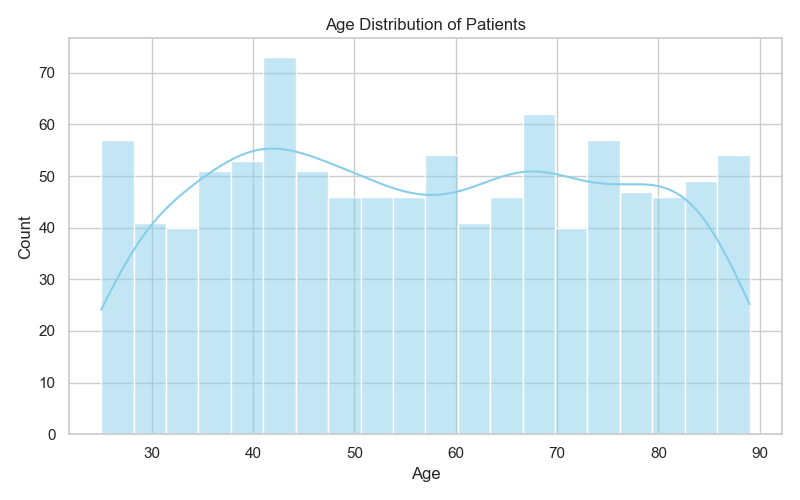

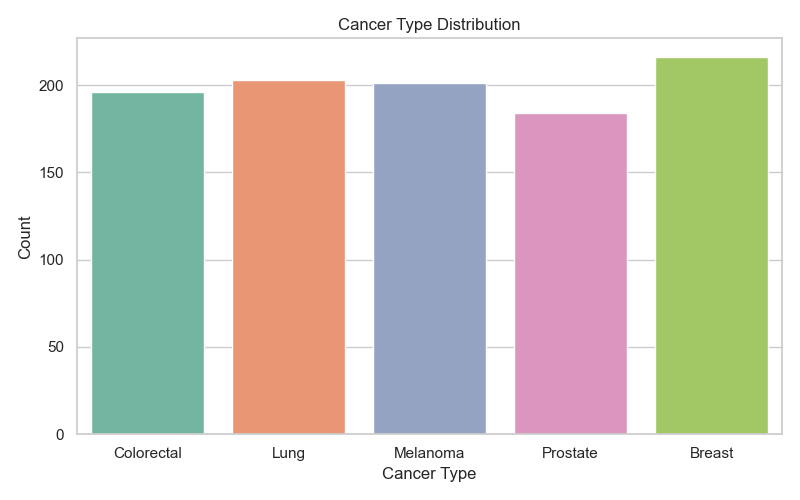

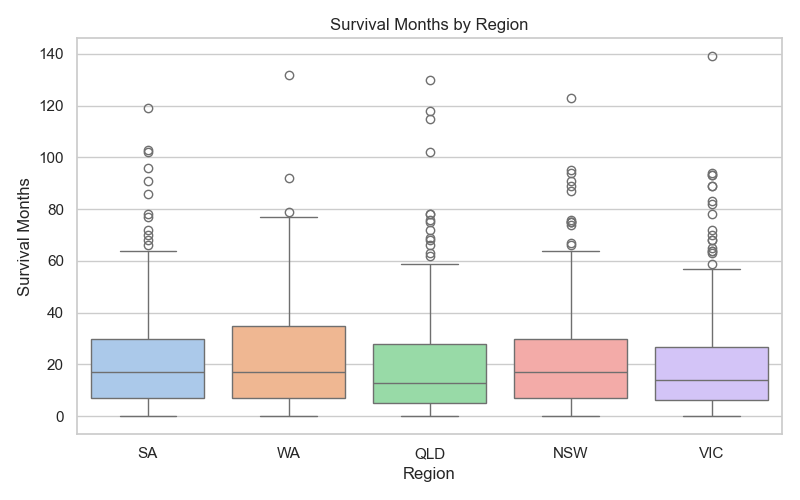

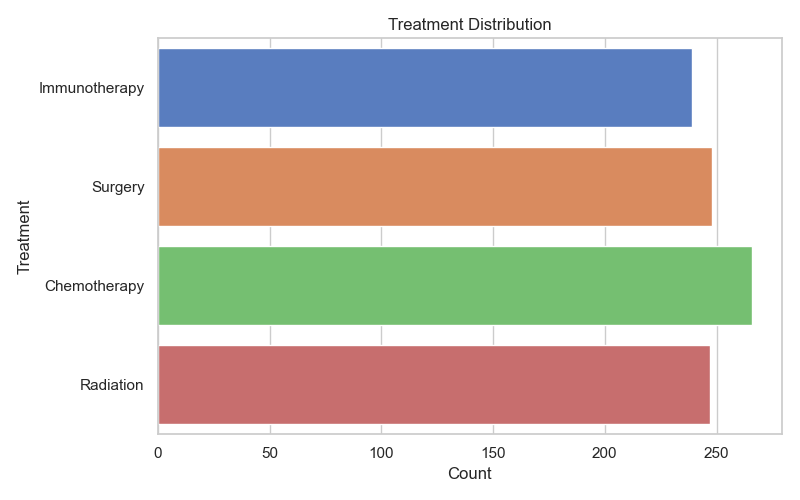

In [16]:
# -------------------------------------------
# 📁 Healthcare Analytics Dashboard
# -------------------------------------------


import os


os.makedirs('figs', exist_ok=True)

# =======================================
# 🏥 Healthcare Analytics Dashboard Project
# =======================================
# 🎗️ Based on Cancer Council NSW Experience

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import os
from datetime import datetime, timedelta
import warnings
warnings.filterwarnings('ignore')

print("📊 GENERATING COMPREHENSIVE HEALTHCARE DATA")

# Create necessary folders for saving outputs
os.makedirs("data", exist_ok=True)
os.makedirs("figs", exist_ok=True)

# ================================
# Step 1: Generate Patient Data
# ================================
n = 1000  # Number of synthetic patients

# Generate synthetic patient information
patients = pd.DataFrame({
    'PatientID': [f'P{i:05d}' for i in range(n)],
    'Age': np.random.randint(25, 90, size=n),
    'Gender': np.random.choice(['Male', 'Female'], size=n),
    'DiagnosisDate': [datetime(2020, 1, 1) + timedelta(days=int(np.random.exponential(365))) for _ in range(n)],
    'CancerType': np.random.choice(['Lung', 'Breast', 'Colorectal', 'Melanoma', 'Prostate'], size=n),
    'Treatment': np.random.choice(['Chemotherapy', 'Radiation', 'Surgery', 'Immunotherapy'], size=n),
    'Region': np.random.choice(['NSW', 'VIC', 'QLD', 'WA', 'SA'], size=n)
})

# Add survival months (simulate with exponential distribution)
patients['SurvivalMonths'] = (np.random.exponential(24, size=n)).astype(int)

# Save to CSV
patients.to_csv("data/patients.csv", index=False)
print("✅ Patient data saved to 'data/patients.csv'")

# ================================
# Step 2: Create Visualizations
# ================================
print("📈 CREATING DASHBOARD VISUALIZATIONS")

# Load data
df = pd.read_csv("data/patients.csv")

# --- Chart 1: Age Distribution ---
plt.figure(figsize=(8, 5))
sns.histplot(df['Age'], bins=20, kde=True, color='skyblue')
plt.title("Age Distribution of Patients")
plt.xlabel("Age")
plt.ylabel("Count")
plt.tight_layout()
plt.savefig("figs/age_distribution.png")
plt.close()

# --- Chart 2: Cancer Type Counts ---
plt.figure(figsize=(8, 5))
sns.countplot(x='CancerType', data=df, palette='Set2')
plt.title("Cancer Type Distribution")
plt.xlabel("Cancer Type")
plt.ylabel("Count")
plt.tight_layout()
plt.savefig("figs/cancer_type_distribution.png")
plt.close()

# --- Chart 3: Survival by Region ---
plt.figure(figsize=(8, 5))
sns.boxplot(x='Region', y='SurvivalMonths', data=df, palette='pastel')
plt.title("Survival Months by Region")
plt.xlabel("Region")
plt.ylabel("Survival Months")
plt.tight_layout()
plt.savefig("figs/survival_by_region.png")
plt.close()

# --- Chart 4: Treatment Usage ---
plt.figure(figsize=(8, 5))
sns.countplot(y='Treatment', data=df, palette='muted')
plt.title("Treatment Distribution")
plt.xlabel("Count")
plt.ylabel("Treatment")
plt.tight_layout()
plt.savefig("figs/treatment_distribution.png")
plt.close()

print("✅ Visualizations saved in 'figs/' directory")

# ================================
# Step 3: Display in Notebook
# ================================
from IPython.display import Image, display

print("\n📊 DISPLAYING DASHBOARD IMAGES BELOW\n")

display(Image("figs/age_distribution.png"))
display(Image("figs/cancer_type_distribution.png"))
display(Image("figs/survival_by_region.png"))
display(Image("figs/treatment_distribution.png"))


